# EX 1
## With data aggregation and data visualization answer the following questions:
### What is the change in pct of divorced danes from 2008 to 2020?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=F&Tid=2008K4%2C2020K1&OMR%C3%85DE=000'
dst = pd.read_csv(url, delimiter=";")
((dst['INDHOLD']-dst['INDHOLD'][0]) / dst['INDHOLD'][0])[1] * 100

26.016531067484888

### Which of the 5 biggest cities has the highest percentage of 'Never Married'?

In [2]:
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CTOT&Tid=2020K1&OMR%C3%85DE=101%2C147%2C155%2C185%2C165%2C151%2C153%2C157%2C159%2C161%2C163%2C167%2C169%2C183%2C173%2C175%2C187%2C201%2C240%2C210%2C250%2C270%2C260%2C217%2C219%2C223%2C230%2C400%2C411%2C253%2C259%2C350%2C265%2C269%2C320%2C376%2C316%2C326%2C360%2C370%2C306%2C329%2C330%2C340%2C336%2C390%2C420%2C430%2C440%2C482%2C410%2C480%2C450%2C461%2C479%2C492%2C530%2C561%2C563%2C607%2C510%2C621%2C540%2C550%2C573%2C575%2C630%2C580%2C710%2C766%2C615%2C707%2C727%2C730%2C741%2C740%2C746%2C706%2C751%2C657%2C661%2C756%2C665%2C760%2C779%2C671%2C791%2C810%2C813%2C860%2C849%2C825%2C846%2C773%2C840%2C787%2C820%2C851'
dst = pd.read_csv(url, delimiter=';')

#alleliste=pd.DataFrame(dst[:]).sort_values('INDHOLD', ascending=False).drop_duplicates(['OMRÅDE'])
alleliste=pd.DataFrame(dst[:]).drop_duplicates(['OMRÅDE']).nlargest(5, 'INDHOLD')
data = dst[dst['OMRÅDE'].isin(alleliste['OMRÅDE'])].sort_values('OMRÅDE', ascending=False).iloc[::-1]

for city in alleliste['OMRÅDE']:
    mask = (data['OMRÅDE'] == city) & (data['CIVILSTAND'] == 'Ugift')
    maskall = (data['OMRÅDE'] == city) & (data['CIVILSTAND'] == 'I alt')
    print(city +' ' + str((np.sum(data[mask]['INDHOLD']) / np.sum(data[maskall]['INDHOLD']))*100))

København 65.23579087199924
Aarhus 59.576893734838556
Aalborg 54.448462512956354
Odense 54.90129090509773
Frederiksberg 58.272374286946935


### Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

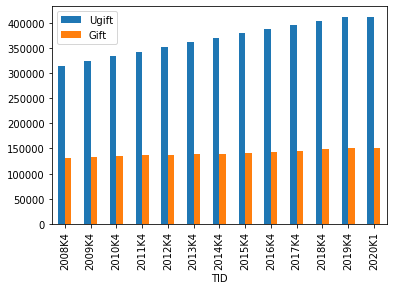

In [9]:
url='https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K4%2C2009K4%2C2010K4%2C2011K4%2C2012K4%2C2013K4%2C2014K4%2C2015K4%2C2016K4%2C2017K4%2C2018K4%2C2019K4%2C2020K1&CIVILSTAND=U%2CG&OMR%C3%85DE=101'
dst = pd.read_csv(url, delimiter=';')

ugift=dst['CIVILSTAND'] == 'Ugift'
gift=dst['CIVILSTAND'] == 'Gift/separeret'

left = pd.DataFrame(dst[ugift])
right = pd.DataFrame(dst[gift])

result = pd.merge(left, right, on=('TID', 'OMRÅDE'))
result.rename(columns={'INDHOLD_x':'Ugift'}, inplace=True)
result.rename(columns={'INDHOLD_y':'Gift'}, inplace=True)

df = pd.DataFrame(result[:])
df.plot.bar(x='TID')

### Show a bar chart of 'Married' and 'Never Married' for all ages in DK 

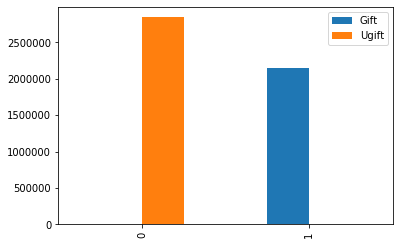

In [13]:
url='https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CG&Tid=2020K1&ALDER=IALT'
dst = pd.read_csv(url, delimiter=';')

ugift=dst['CIVILSTAND'] == 'Ugift'
gift=dst['CIVILSTAND'] == 'Gift/separeret'

df = pd.DataFrame({'Gift': dst[gift]['INDHOLD'], 'Ugift': dst[ugift]['INDHOLD']})
df.plot.bar()

# Ex 2

### Show a chart of the population of Copenhagen from 1980-2020

Text(0.5, 1.0, 'People in Copenhagen')

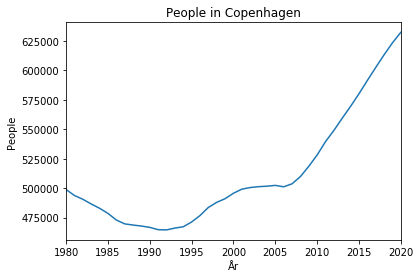

In [29]:
url = 'https://api.statbank.dk/v1/data/FT/CSV?delimiter=Semicolon&HOVEDDELE=101&Tid=1980%2C1981%2C1982%2C1983%2C1984%2C1985%2C1986%2C1987%2C1988%2C1989%2C1990%2C1991%2C1992%2C1993%2C1994%2C1995%2C1996%2C1997%2C1998%2C1999%2C2000%2C2001%2C2002%2C2003%2C2004%2C2005%2C2006%2C2007%2C2008%2C2009%2C2010%2C2011%2C2012%2C2013%2C2014%2C2015%2C2016%2C2017%2C2018%2C2019%2C2020'
data = pd.read_csv(url, delimiter=';')
df = pd.DataFrame(data[:])
ax = df.set_index('TID')['INDHOLD'].plot()
ax.set_ylabel('People')
ax.set_xlabel('År')
ax.set_title('People in Copenhagen')

### Show number of deaths in Denmark 1901-2019

Text(0, 0.5, 'Antal personer')

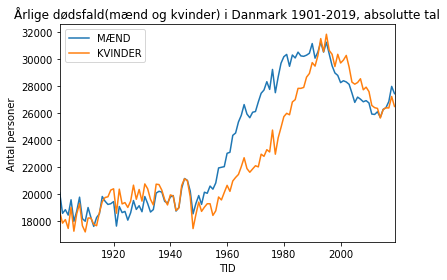

In [10]:
url='https://api.statbank.dk/v1/data/HISB3/CSV?delimiter=Semicolon&BEV%C3%86GELSE=DM%2CDK&Tid=1901%2C1902%2C1903%2C1904%2C1905%2C1906%2C1907%2C1908%2C1909%2C1910%2C1911%2C1912%2C1913%2C1914%2C1915%2C1916%2C1917%2C1918%2C1919%2C1920%2C1921%2C1922%2C1923%2C1924%2C1925%2C1926%2C1927%2C1928%2C1929%2C1930%2C1931%2C1932%2C1933%2C1934%2C1935%2C1936%2C1937%2C1938%2C1939%2C1940%2C1941%2C1942%2C1943%2C1944%2C1945%2C1946%2C1947%2C1948%2C1949%2C1950%2C1951%2C1952%2C1953%2C1954%2C1955%2C1956%2C1957%2C1958%2C1959%2C1960%2C1961%2C1962%2C1963%2C1964%2C1965%2C1966%2C1967%2C1968%2C1969%2C1970%2C1971%2C1972%2C1973%2C1974%2C1975%2C1976%2C1977%2C1978%2C1979%2C1980%2C1981%2C1982%2C1983%2C1984%2C1985%2C1986%2C1987%2C1988%2C1989%2C1990%2C1991%2C1992%2C1993%2C1994%2C1995%2C1996%2C1997%2C1998%2C1999%2C2000%2C2001%2C2002%2C2003%2C2004%2C2005%2C2006%2C2007%2C2008%2C2009%2C2010%2C2011%2C2012%2C2013%2C2014%2C2015%2C2016%2C2017%2C2018%2C2019'
data = pd.read_csv(url, delimiter=';')

menmask = data['BEVÆGELSE'] == 'Døde mænd'
womenmask = data['BEVÆGELSE'] == 'Døde kvinder'

men = data[menmask][['TID', 'INDHOLD']]
men.rename(columns={'INDHOLD':'MÆND'}, inplace=True)

women = data[womenmask][['TID', 'INDHOLD']]
women.rename(columns={'INDHOLD':'KVINDER'}, inplace=True)

left = pd.DataFrame(women)
right = pd.DataFrame(men)

result = pd.merge(left, right, on=('TID'))

df = pd.DataFrame(result[:])

ax = df.set_index('TID')[['MÆND','KVINDER']].plot()
ax.set_title('Årlige dødsfald(mænd og kvinder) i Danmark 1901-2019, absolutte tal')
ax.set_ylabel('Antal personer')

Text(0, 0.5, 'Antal personer')

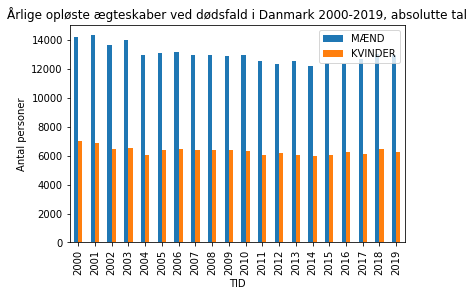

In [5]:
url = 'https://api.statbank.dk/v1/data/HISB3/CSV?BEV%C3%86GELSE=OKD%2COMD&Tid=2000%2C2001%2C2002%2C2003%2C2004%2C2005%2C2006%2C2007%2C2008%2C2009%2C2010%2C2011%2C2012%2C2013%2C2014%2C2015%2C2016%2C2017%2C2018%2C2019'
data = pd.read_csv(url, delimiter=';')

womenmask = data['BEVÆGELSE'] == 'Opløste ægteskaber, kones død'
women = data[womenmask][['TID', 'INDHOLD']]
women.rename(columns={'INDHOLD':'KVINDER'}, inplace=True)

menmask = data['BEVÆGELSE'] == 'Opløste ægteskaber, mands død'
men = data[menmask][['TID', 'INDHOLD']]
men.rename(columns={'INDHOLD':'MÆND'}, inplace=True)

left = pd.DataFrame(women)
right = pd.DataFrame(men)

result = pd.merge(left, right, on=('TID'))

df = pd.DataFrame(result[:])
ax = df.set_index('TID')[['MÆND','KVINDER']].plot.bar()
ax.set_title('Årlige opløste ægteskaber ved dødsfald i Danmark 2000-2019, absolutte tal')
ax.set_ylabel('Antal personer')